In [2]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint #ODE module

In [3]:
# this computes the concentration of lignad, controlled by light
# light intensity, mW/mm^2
I = 1
# absorption coefficient (mm^2/mW)s^-1
a = 1
# concentration of cage, M
c = 0.0001
ts = np.linspace(0,10,1000) # time in seconds; each point 10 ms
Ls = c*(1-np.exp(-a*I*ts))

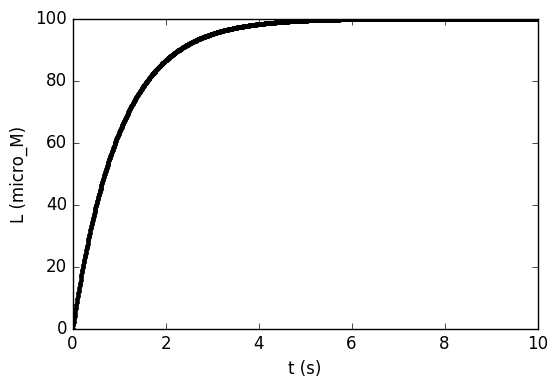

In [4]:
# concentration of uncaged ligand as a function of time
# this is with modest light intensity
plt.rcParams.update({'font.size': 12})  # increase the font size
plt.xlabel("t (s)")
plt.ylabel("L (micro_M)")
plt.plot(ts, Ls*1e6, 'k.');

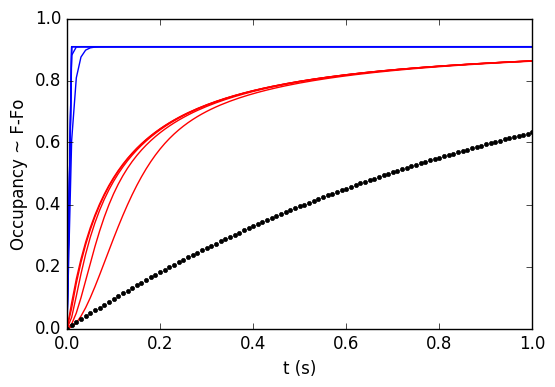

In [5]:
# Kd for this run
Kd = 1e-5 # in M

# range of kon (units: (M s)^-1); i.e. 8 corresponds to 10^8 /Ms
kon= np.logspace(6, 8, num=5, base=10)
kin = []
for on in kon:
    kin.append((on, Kd*on))

O_0 = 0.0  # the initial condition

# compute occupancy/fluorescence response to step function in concentration
def dO_dt(O, t, k_on, k_off):
    Lt = c
    return(-(k_off + k_on*Lt)*O+k_on*Lt)

for ki in kin:
    Os = odeint(dO_dt, O_0, ts, ki)
    Os = np.array(Os).flatten()
    plt.plot(ts, Os, 'b'); 

# compute occupancy/fluorescence response to concentration ramp    
def dO_dt(O, t, k_on, k_off):
    Lt = c*(1-np.exp(-a*I*t))
    return(-(k_off + k_on*Lt)*O+k_on*Lt)

for ki in kin:
    Os = odeint(dO_dt, O_0, ts, ki)
    Os = np.array(Os).flatten()
    plt.plot(ts, Os, 'r');    
    
plt.plot(ts, Ls*10000, 'k.')
plt.axis([0, 1, 0, 1])
plt.xlabel("t (s)")
plt.ylabel("Occupancy ~ F-Fo")
plt.show()    
    

In [9]:
# mni caged glutamate
q = 4000 # (M cm)^-1
qe = 0.1 # quantum efficiency
I = 1e1 # intensity W /m^2
wl = 0.370e-6 # wavelength, m

# E = h c / wl
h = 6.6e-34 # J s
c = 3e8 # m/s
I_p = I * (wl / (h*c))
print(I_p) # number of photons / (s m^2)




1.868686868686869e+19
